In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Combined Customers Data - Sheet1.csv to Combined Customers Data - Sheet1.csv


In [ ]:
import io
import pandas as pd
data = pd.read_csv(io.BytesIO(uploaded['Combined Customers Data - Sheet1.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Separate the labels (fraudulent or normal) from the input features
labels = data['FLAG']
input_features = data.drop(columns=['CUSTOMER', 'FLAG'])

# Replace non-numeric or null values with NaN in input features
input_features = input_features.apply(pd.to_numeric, errors='coerce')

# Replace NaN values with zero
input_features = input_features.fillna(0)

# Stratified splitting of the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(input_features, labels, test_size=0.3, stratify=labels, random_state=42)

# Reshape the input data for LSTM
time_steps = 1  # Each month considered as a single time step
num_features = X_train.shape[1]
X_train_lstm = np.array(X_train).reshape(-1, time_steps, num_features)
X_test_lstm = np.array(X_test).reshape(-1, time_steps, num_features)

In [ ]:
# Define the LSTM model
def create_lstm_model():
    model = models.Sequential()
    model.add(layers.LSTM(128, input_shape=(time_steps, num_features)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))  # Output layer with sigmoid for binary classification
    return model

# Create the LSTM model
lstm_model = create_lstm_model()

# Compile the model
lstm_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

# Print the model summary
lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 128)               72192     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 80,513
Trainable params: 80,513
Non-trainable params: 0
_________________________________________________________________


Test Accuracy before training: 0.8981481194496155
Epoch 1/10
8/8 [==============================] - 2s 5ms/step - loss: 0.3769 - accuracy: 0.8730
Epoch 2/10
8/8 [==============================] - 0s 5ms/step - loss: 0.2361 - accuracy: 0.8810
Epoch 3/10
8/8 [==============================] - 0s 4ms/step - loss: 0.2119 - accuracy: 0.8968
Epoch 4/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1813 - accuracy: 0.9325
Epoch 5/10
8/8 [==============================] - 0s 5ms/step - loss: 0.1601 - accuracy: 0.9683
Epoch 6/10
8/8 [==============================] - 0s 5ms/step - loss: 0.1412 - accuracy: 0.9683
Epoch 7/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1295 - accuracy: 0.9683
Epoch 8/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1197 - accuracy: 0.9643
Epoch 9/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1102 - accuracy: 0.9683
Epoch 10/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1024 - accura

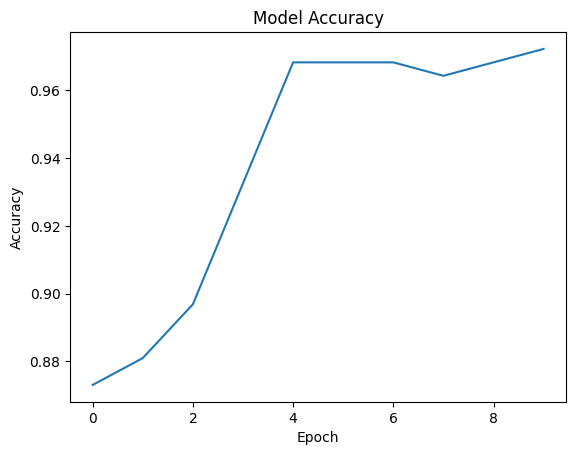

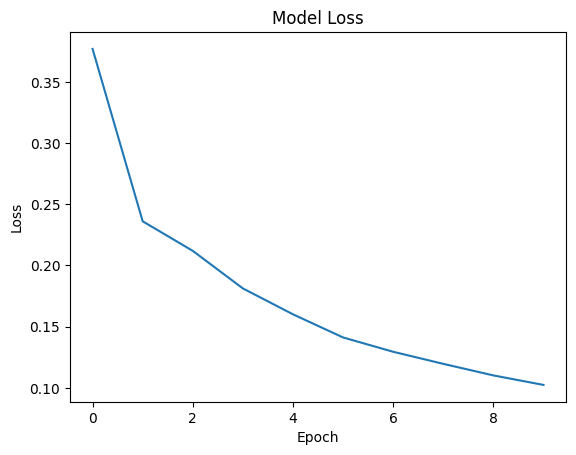

In [ ]:
# Evaluate the model on the test data before training
test_loss_before, test_accuracy_before = lstm_model.evaluate(X_test_lstm, y_test, verbose=0)
print("Test Accuracy before training:", test_accuracy_before)

# Train the model using the training data
history = lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32)

# Evaluate the model on the test data
test_loss, test_accuracy = lstm_model.evaluate(X_test_lstm, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)

# Plot the accuracy and loss over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
